## Pre-Processing Missing Values Imputation
- Univariate
    - fillna()  ---> Pandas
    - SimpleIputer()   ---> Sklearn
- Multivarite
    - KNNImputer()  ---> Sklearn
    - IterativeImputer()  ---> Sklearn

## 1) Univariate Imputation (Pandas)
### i) Deletion 

In [26]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

In [81]:
df = pd.read_csv("datasets/loan-eligibility.csv")
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [37]:
df.isna().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [38]:
cols = [var for var in df.columns if df[var].isna().sum()>0]
cols

['Gender',
 'Married',
 'Dependents',
 'Self_Employed',
 'LoanAmount',
 'Loan_Amount_Term',
 'Credit_History']

In [39]:
df.isna().sum().sum()

149

In [40]:
df.isna().mean() * 100

Loan_ID              0.000000
Gender               2.117264
Married              0.488599
Dependents           2.442997
Education            0.000000
Self_Employed        5.211726
ApplicantIncome      0.000000
CoapplicantIncome    0.000000
LoanAmount           3.583062
Loan_Amount_Term     2.280130
Credit_History       8.143322
Property_Area        0.000000
Loan_Status          0.000000
dtype: float64

#### Deleting Missing Values Rows

In [41]:
df1 = df.dropna(axis=0, how="any", inplace=False)
print(df1.shape)
df1.isnull().sum()

(480, 13)


Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

#### Deleting Missing Values Columns

In [42]:
df2 = df.dropna(axis=1, how="any", inplace=False)
print(df2.shape)
df2.isnull().sum()  #only 6 columns left of 13 columns

(614, 6)


Loan_ID              0
Education            0
ApplicantIncome      0
CoapplicantIncome    0
Property_Area        0
Loan_Status          0
dtype: int64

 ### ii) Imputation

In [43]:
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [44]:
df3 = df.fillna(value="missing")
df3

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,missing,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [45]:
df3.isna().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

#### replacing with zero

In [47]:
df3 = df.copy()
df3['Dependents'] = df['Dependents'].fillna(value=0, inplace=False)
df3['Dependents'].isna().sum()

0

#### Replacing with Mean

In [49]:
df3['LoanAmount'] = df['LoanAmount'].fillna(value=df['LoanAmount'].mean(), inplace=False)
df3['Credit_History'] = df['Credit_History'].fillna(value=df['Credit_History'].mean(), inplace=False)
df3.isna().sum()

Loan_ID               0
Gender               13
Married               3
Dependents            0
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term     14
Credit_History        0
Property_Area         0
Loan_Status           0
dtype: int64

In [50]:
df3

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.000000,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.000000,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.000000,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.000000,360.0,1.0,Urban,Y


#### Replacing with Mode (acategorical Values) Most Frequent Data 

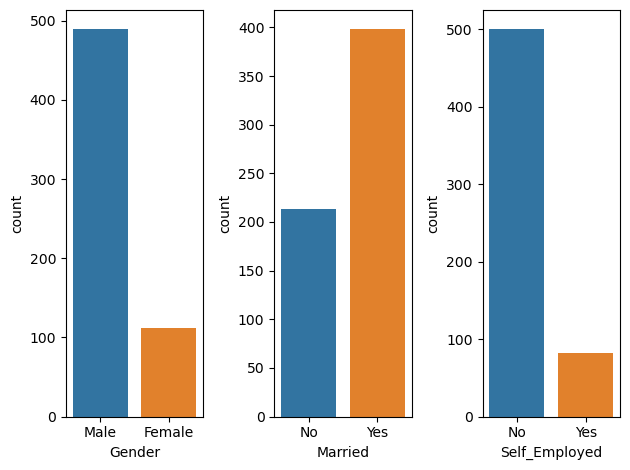

In [54]:
fig, (ax1, ax2, ax3) = plt.subplots(nrows=1, ncols=3)
sns.countplot(x='Gender', data=df, ax=ax1)
sns.countplot(x='Married', data=df, ax=ax2)
sns.countplot(x='Self_Employed', data=df, ax=ax3)
plt.tight_layout()

In [57]:
df3['Gender'] = df['Gender'].fillna(value=df['Gender'].mode()[0], inplace=False)
df3['Married'] = df['Married'].fillna(value=df['Credit_History'].mode()[0], inplace=False)
df3['Self_Employed'] = df['Self_Employed'].fillna(value=df['Self_Employed'].mode()[0], inplace=False)
df3.isna().sum() # MODE RETURNS A SERIES OBJECT SO USE SUBSCRIPT TO USE TOP VALUE

Loan_ID               0
Gender                0
Married               0
Dependents            0
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term     14
Credit_History        0
Property_Area         0
Loan_Status           0
dtype: int64

#### Repacing with Median in case of Outliers

In [58]:
df3['Loan_Amount_Term'] = df['Loan_Amount_Term'].fillna(value=df['Loan_Amount_Term'].median(), inplace=False)
df3.isna().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

#### Forward Fil and Backward Fill

In [59]:
x = pd.Series(range(1,7))
x[2] = np.nan
x[4] = np.nan
x

0    1.0
1    2.0
2    NaN
3    4.0
4    NaN
5    6.0
dtype: float64

In [63]:
x.fillna(method='ffill', inplace=False)

0    1.0
1    2.0
2    2.0
3    4.0
4    4.0
5    6.0
dtype: float64

In [64]:
x.fillna(method='bfill', inplace=False)

0    1.0
1    2.0
2    4.0
3    4.0
4    6.0
5    6.0
dtype: float64

### Distribution Before and After Imputation remains Same

In [68]:
df['LoanAmount_Median'] = df['LoanAmount'].fillna(value=df['LoanAmount'].median())

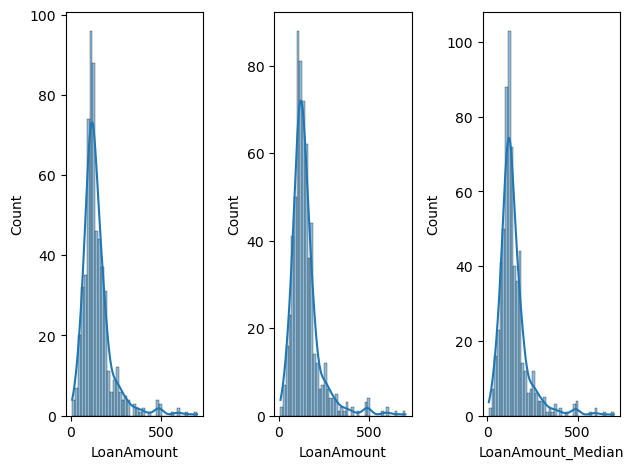

In [72]:
fig, (ax1,ax2,ax3) = plt.subplots(nrows=1, ncols=3)
sns.histplot(x=df['LoanAmount'], kde=True, ax=ax1)
sns.histplot(x=df3['LoanAmount'], kde=True, ax=ax2)
sns.histplot(x=df['LoanAmount_Median'], kde=True, ax=ax3)
plt.tight_layout()

## 1) Univariate (SkLearn Transformers)

In [73]:
from sklearn.impute import SimpleImputer

In [80]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,LoanAmount_Median
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y,128.0
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N,128.0
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y,66.0
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y,120.0
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y,141.0


In [82]:
df.isna().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [83]:
imp = SimpleImputer(missing_values=np.nan, strategy='constant', fill_value=0) #DEPENDENTS COLUMN
imp.fit(df.iloc[:, 3:4])
df.iloc[:, 3:4]=imp.transform(df.iloc[:, 3:4])
df.isna().sum()

Loan_ID               0
Gender               13
Married               3
Dependents            0
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [84]:
#GENDER, MARRIED AND SELF_EMPLOYED COLUMNS...
imp = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
df.iloc[:, [1,2,5]]=imp.fit_transform(df.iloc[:,[1,2,5]])
df.isna().sum()

Loan_ID               0
Gender                0
Married               0
Dependents            0
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [85]:
#LoanAmount, Loan_Amount_Term , Credit_History
imp = SimpleImputer(missing_values=np.nan, strategy='mean')
df.iloc[:,8:11]=imp.fit_transform(df.iloc[:,8:11])
df.isna().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

### Column Transformer

In [87]:
df = pd.read_csv("datasets/loan-eligibility.csv")
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [88]:
from sklearn.compose import ColumnTransformer

In [91]:
imp_const=SimpleImputer(missing_values=np.nan, strategy='constant', fill_value=0)
imp_mode=SimpleImputer(missing_values=np.nan, strategy='most_frequent')
imp_mean=SimpleImputer(missing_values=np.nan, strategy='mean')
col_trans = ColumnTransformer(
                            [
                                ('imp_dep', imp_const, [3]),
                                ('imp_gen_marr_self', imp_mode, [1,2,5]),
                                ('imp_loan', imp_mean, [8,9,10])], 
                    remainder='passthrough')
result = col_trans.fit_transform(df)
result

array([['0', 'Male', 'No', ..., 0.0, 'Urban', 'Y'],
       ['1', 'Male', 'Yes', ..., 1508.0, 'Rural', 'N'],
       ['0', 'Male', 'Yes', ..., 0.0, 'Urban', 'Y'],
       ...,
       ['1', 'Male', 'Yes', ..., 240.0, 'Urban', 'Y'],
       ['2', 'Male', 'Yes', ..., 0.0, 'Urban', 'Y'],
       ['0', 'Female', 'No', ..., 0.0, 'Semiurban', 'N']], dtype=object)

In [94]:
df_imputed = pd.DataFrame(data=result, columns=df.columns)
df_imputed.isna().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

## Multivariate Imputation Sklearn
###  i) Iterartive Imputer

In [95]:
X = pd.DataFrame({
 'x1':[np.nan,2,3,4,5],
 'x2':[6,np.nan,8,9,10],
 'x3':[11,12,np.nan,14,15],
 'x4':[16,17,18,19,np.nan]
 })
X

,x1,x2,x3,x4
0,NaN,6.0,11.0,16.0
1,2.0,NaN,12.0,17.0
2,3.0,8.0,NaN,18.0
3,4.0,9.0,14.0,19.0
4,5.0,10.0,15.0,NaN


In [97]:
from sklearn.linear_model import LinearRegression
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

In [98]:
lr = LinearRegression()
it_imp = IterativeImputer(estimator=lr, missing_values=np.nan, initial_strategy='mean',max_iter=10)
it_imp.fit_transform(X) #RETURNS 2D NUMPY ARRAY

array([[ 1.,  6., 11., 16.],
       [ 2.,  7., 12., 17.],
       [ 3.,  8., 13., 18.],
       [ 4.,  9., 14., 19.],
       [ 5., 10., 15., 20.]])

### ii) KNN Imputer

In [99]:
from sklearn.impute import KNNImputer

In [100]:
X2 = pd.DataFrame({
 'x1':[23,np.nan, 13, 30,25],
 'x2':[np.nan, 35,41,np.nan,50],
 'x3':[57,58,61,71,69],
 'x4':[11,2,8,np.nan, np.nan]
 })
X2

,x1,x2,x3,x4
0,23.0,NaN,57,11.0
1,NaN,35.0,58,2.0
2,13.0,41.0,61,8.0
3,30.0,NaN,71,NaN
4,25.0,50.0,69,NaN


In [101]:
knn_imp = KNNImputer(missing_values=np.nan, n_neighbors=2, weights='uniform', metric='nan_euclidean')
knn_imp.fit_transform(X2)

array([[23. , 38. , 57. , 11. ],
       [18. , 35. , 58. ,  2. ],
       [13. , 41. , 61. ,  8. ],
       [30. , 42.5, 71. ,  6.5],
       [25. , 50. , 69. ,  9.5]])